<a href="https://colab.research.google.com/github/redLeo-D/project_stat597/blob/master/stat534_Duan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive")

print('Files in Drive:')
!ls /content/drive/'My Drive'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Files in Drive:
'Colab Notebooks'  'Getting started.pdf'


In [0]:
import os

path = "/content/drive/My Drive/Colab Notebooks/"
os.chdir(path)
os.listdir(path)

['Untitled0.ipynb',
 'DMSC.csv',
 'IMDB Dataset.csv',
 'Copy of Welcome To Colaboratory',
 'GPU.ipynb',
 'stat534slides_Duan.ipynb']

In [0]:
import pandas as pd
import numpy as np
raw_imdb = pd.read_csv('IMDB Dataset.csv')
raw_douban = pd.read_csv('DMSC.csv')
raw_douban_sim=raw_douban[["Comment","Star"]]

In [0]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
L=WordNetLemmatizer()
import re
stop_words = set(stopwords.words('english'))
def remove(text):
    text1=re.sub("[^\w]"," ",text)
    text2=re.sub("br"," ",text1)
    tokens1 = word_tokenize(text2)
    tokens = list(map(L.lemmatize,tokens1))
    clean_tokens = tokens[:] 
    for token in  tokens: 
        if token in stop_words: 
            clean_tokens.remove(token)
        w1 = [w for w in clean_tokens]   
    return( " ".join(w1))

In [0]:
imdb_clearreview=raw_imdb["review"].apply(remove)

In [0]:
raw_imdb["review"]=imdb_clearreview
raw_imdb.head()

,review,sentiment
0,One reviewer ha mentioned watching 1 Oz episod...,positive
1,A wonderful little production The filming tech...,positive
2,I thought wa wonderful way spend time hot summ...,positive
3,Basically family little boy Jake think zombie ...,negative
4,Petter Mattei Love Time Money visually stunnin...,positive


In [0]:
for i in range(len(raw_imdb["sentiment"])):
    if raw_imdb["sentiment"][i]=="positive":
        raw_imdb["sentiment"][i]=1
    else:
        raw_imdb["sentiment"][i]=0

In [0]:
raw_imdb.head()

,review,sentiment
0,One reviewer ha mentioned watching 1 Oz episod...,1
1,A wonderful little production The filming tech...,1
2,I thought wa wonderful way spend time hot summ...,1
3,Basically family little boy Jake think zombie ...,0
4,Petter Mattei Love Time Money visually stunnin...,1


In [0]:
raw_imdb["sentiment"].value_counts(normalize=1)[0:1] #half pos half neg

1    0.5
Name: sentiment, dtype: float64

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

In [0]:
X = raw_imdb["review"]
y = raw_imdb["sentiment"]
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=243,test_size=0.5)  #split data

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train) # into vector in one-hot encoding
X_test_vec = vectorizer.transform(X_test)

print("Dic Size:", len(vectorizer.get_feature_names()))

Dic Size: 71369


In [0]:
import time
X_train_vec.shape

(25000, 71369)

In [0]:

time1 = time.process_time()    
model_mult_nb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
model_mult_nb.fit(X_train_vec,y_train)
print("Train score", model_mult_nb.score(X_train_vec,y_train))
print("Test score", model_mult_nb.score(X_test_vec,y_test))
time2 = time.process_time()
diff_time = time2 - time1
print("Time",diff_time)

Time 0.032180842000002485
Train score 0.90716
Test score 0.85364


In [0]:
time1 = time.process_time() 
rf = RandomForestClassifier(random_state=243,n_estimators = 10)
rf.fit(X_train_vec,y_train)
print("Cross Val Score: ",cross_val_score(rf,X_train_vec,y_train,cv=5).mean())
print("Train Score: ", round(rf.score(X_train_vec,y_train),4))
print("Train Score: ", round(rf.score(X_test_vec,y_test),4))
time2 = time.process_time() 
diff_time = time2 - time1
print("Time",diff_time)

Cross Val Score:  0.75588
Train Score:  0.994
Train Score:  0.7624
Time 45.806724309


In [0]:
time1 = time.process_time()    
bagged = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=243)
                            ,max_samples=0.5, max_features=0.5,n_estimators = 10)
bagged.fit(X_train_vec,y_train)
print("Cross Val Score: ",cross_val_score(bagged,X_train_vec,y_train,cv=5).mean())
print("Train Score: ",bagged.score(X_train_vec,y_train))
print("Test Score: ",bagged.score(X_test_vec,y_test))
time2 = time.process_time() 
diff_time = time2 - time1
print("Time",diff_time)

Cross Val Score:  0.7787999999999999
Train Score:  0.95012
Test Score:  0.78864
Time 374.881592202


In [0]:
model__max_features = ['auto',0.8,0.75,0.5]
model__max_depth = [60,70,80,90,100,200]
criterion=['entropy','gini']
results = []
for c in criterion:
    for feat in model__max_features:
        for depth in model__max_depth:
            time1 = time.process_time()
            rf = RandomForestClassifier(n_estimators = 10,random_state=243, criterion=c,max_depth=depth,max_features=feat
                                    ,min_samples_leaf = 1)
            rf.fit(X_train_vec,y_train)
            cv_score = round(cross_val_score(rf,X_train_vec,y_train,cv=5).mean(),5)
            train_score = round(rf.score(X_train_vec,y_train),5)
            test_score = round(rf.score(X_test_vec,y_test),5) 
            time2 = time.process_time() 
            diff_time = time2 - time1
            results.append([c,feat,depth,cv_score,train_score,test_score,diff_time ])

In [0]:
results=[['gini', 'auto', 60, 0.77429, 0.95901, 0.77896, 43.578125],   #results
['gini', 'auto', 70, 0.77051, 0.96928, 0.78384, 49.328125],
['gini', 'auto', 80, 0.77245, 0.978, 0.778, 53.09375],
['gini', 'auto', 90, 0.76656, 0.98352, 0.7756, 57.078125],
['gini', 'auto', 100, 0.76789, 0.98643, 0.77448, 60.140625],
['gini', 'auto', 200, 0.76227, 0.99331, 0.7628, 70.0],
['gini', 0.8, 60, 0.78304, 0.96963, 0.78576, 1255.59375],
['gini', 0.8, 70, 0.78195, 0.97405, 0.79104, 1332.625],
['gini', 0.8, 80, 0.78275, 0.97832, 0.78312, 1385.703125],
['gini', 0.8, 90, 0.78285, 0.98096, 0.78296, 1392.21875],
['gini', 0.8, 100, 0.78011, 0.98387, 0.78616, 1422.140625],
['gini', 0.8, 200, 0.77912, 0.98736, 0.78416, 1552.359375],
['gini', 0.75, 60, 0.78043, 0.96995, 0.78336, 1168.28125],
['gini', 0.75, 70, 0.78211, 0.97371, 0.78512, 1235.0],
['gini', 0.75, 80, 0.78216, 0.97883, 0.78232, 1288.25],
['gini', 0.75, 90, 0.78085, 0.98149, 0.7812, 1330.015625],
['gini', 0.75, 100, 0.78152, 0.98323, 0.78256, 1358.328125],
['gini', 0.75, 200, 0.78056, 0.98635, 0.78096, 1477.421875],
['gini', 0.5, 60, 0.78331, 0.96789, 0.78696, 855.515625],
['gini', 0.5, 70, 0.78365, 0.97389, 0.78616, 902.84375],
['gini', 0.5, 80, 0.78309, 0.97859, 0.78568, 939.421875],
['gini', 0.5, 90, 0.78269, 0.98048, 0.78416, 960.46875],
['gini', 0.5, 100, 0.78336, 0.98176, 0.78912, 983.09375],
['gini', 0.5, 200, 0.78275, 0.98765, 0.7864, 1061.59375], 
['entropy', 'auto', 60, 0.77853, 0.95779, 0.7868, 42.375],
['entropy', 'auto', 70, 0.78112, 0.9692, 0.78072, 45.90625],
 ['entropy', 'auto', 80, 0.77912, 0.97779, 0.78496, 50.609375],
 ['entropy', 'auto', 90, 0.77683, 0.98224, 0.78336, 54.0],
 ['entropy', 'auto', 100, 0.77725, 0.98624, 0.77968, 56.265625],
 ['entropy', 'auto', 200, 0.77035, 0.99325, 0.77872, 66.140625],
 ['entropy', 0.8, 60, 0.78392, 0.98147, 0.78664, 1235.546875],
 ['entropy', 0.8, 70, 0.78448, 0.98472, 0.79144, 1242.453125],
 ['entropy', 0.8, 80, 0.78728, 0.98632, 0.78656, 1248.3125],
 ['entropy', 0.8, 90, 0.78459, 0.98733, 0.7892, 1260.078125],
 ['entropy', 0.8, 100, 0.78675, 0.98755, 0.7912, 1394.3125],
 ['entropy', 0.8, 200, 0.78421, 0.98859, 0.78968, 1433.3125],
 ['entropy', 0.75, 60, 0.78629, 0.97885, 0.78872, 1170.65625],
 ['entropy', 0.75, 70, 0.78387, 0.98237, 0.79072, 1149.59375],
 ['entropy', 0.75, 80, 0.78189, 0.98587, 0.78472, 1170.9375],
 ['entropy', 0.75, 90, 0.78285, 0.98661, 0.78688, 1182.265625],
 ['entropy', 0.75, 100, 0.78472, 0.98688, 0.7872, 1189.609375],
 ['entropy', 0.75, 200, 0.78333, 0.98944, 0.78616, 1205.015625],
 ['entropy', 0.5, 60, 0.78851, 0.97915, 0.79136, 825.15625],
 ['entropy', 0.5, 70, 0.78507, 0.98323, 0.79472, 850.203125],
 ['entropy', 0.5, 80, 0.78424, 0.98592, 0.78672, 866.328125],
 ['entropy', 0.5, 90, 0.78973, 0.98677, 0.78712, 874.734375],
 ['entropy', 0.5, 100, 0.78363, 0.98637, 0.7892, 882.375],
 ['entropy', 0.5, 200, 0.78741, 0.98792, 0.79088, 891.09375]]


'gini', 0.8, 70 #best
0.78195, 0.97405, 0.79104, 1332.625
'entropy', 0.8, 70, 0.78448, 0.98472, 0.79144, 1242.453125

In [0]:
 n_est = [10,20,30,50,100,200]
 results_n = []
 for n in n_est:
            time1 = time.process_time()
            rf = RandomForestClassifier(n_estimators = n,random_state=243, criterion='entropy',max_depth=70,max_features=0.8
                                    ,min_samples_leaf = 1)
            rf.fit(X_train_vec,y_train)
            cv_score = round(cross_val_score(rf,X_train_vec,y_train,cv=5).mean(),5)
            train_score = round(rf.score(X_train_vec,y_train),5)
            test_score = round(rf.score(X_test_vec,y_test),5) 
            time2 = time.process_time() 
            diff_time = time2 - time1
            results_n.append([n,cv_score,train_score,test_score,diff_time ])

In [0]:
results_n

In [0]:
importances = rf_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_best.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Word ranking:")
for f in range(0,20): 
    print(f + 1, indices[f], importances[indices[f]],vectorizer.get_feature_names()[indices[f]])  #name

Word ranking:
1 6392 0.028500648616202273 bad
2 9794 0.011629590982875571 boring
3 83124 0.01004605405811155 worst
4 31944 0.00817249946868279 great
5 81430 0.007086654822098362 waste
6 35433 0.004666603800768019 horrible
7 8171 0.004567210771692593 best
8 57554 0.003917764902205889 poor
9 55765 0.003592179102074046 perfect
10 8219 0.0034168026511821902 better
11 6101 0.003353529814641313 awful
12 4121 0.0033289788551688843 annoying
13 49875 0.0033244912627166056 movie
14 25384 0.0032583176110829197 even
15 3471 0.0031979737994388808 amazing
16 74477 0.0031880769234173484 terrible
17 49221 0.003001703810135614 money
18 22683 0.0029478520750341776 dull
19 17170 0.002874793735313955 crap
20 81798 0.0028249362435755895 well


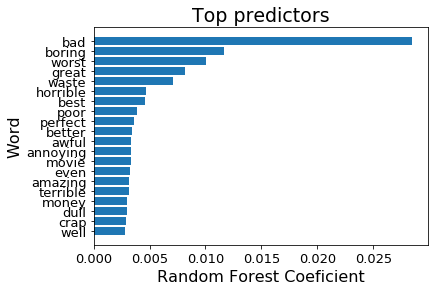

<Figure size 936x936 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
number_features_print = 20
height = [importances[indices[i]] for i in range(0,number_features_print)]
bars = [vectorizer.get_feature_names()[indices[x]] for x in range(0,number_features_print)]
height.reverse()
bars.reverse()
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Top predictors',fontsize=19)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Word', fontsize = 16)
plt.xlabel('Random Forest Coeficient', fontsize = 16)
plt.figure(figsize=(13, 13))
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
max_features = 10000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

In [0]:
maxlen = 500
batch_size = 256

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=100000)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('Build model...')
model = Sequential()
model.add(Embedding(100000, 1024))
model.add(LSTM(1024, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

25000 train sequences
25000 test sequences
Build model...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...



Train on 25000 samples, validate on 25000 samples
Epoch 1/15




/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:421: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 102400000 elements. This may consume a large amount of memory.
  num_elements)





25000/25000 [==============================] - 277s 11ms/step - loss: 0.5721 - acc: 0.6950 - val_loss: 0.5822 - val_acc: 0.7093
Epoch 2/15
25000/25000 [==============================] - 265s 11ms/step - loss: 0.3865 - acc: 0.8346 - val_loss: 0.4838 - val_acc: 0.7903
Epoch 3/15
25000/25000 [==============================] - 265s 11ms/step - loss: 0.3379 - acc: 0.8507 - val_loss: 0.5729 - val_acc: 0.6933
Epoch 4/15
25000/25000 [==============================] - 265s 11ms/step - loss: 0.4326 - acc: 0.7978 - val_loss: 0.4958 - val_acc: 0.7869
Epoch 5/15
25000/25000 [==============================] - 265s 11ms/step - loss: 0.2638 - acc: 0.8912 - val_loss: 0.3936 - val_acc: 0.8456
Epoch 6/15
25000/25000 [==============================] - 265s 11ms/step - loss: 0.1696 - acc: 0.9350 - val_loss: 0.4147 - val_acc: 0.8436
Epoch 7/15
25000/25000 [==============================] - 265s 11ms/step - loss: 0.1121 - acc: 0.9593 - val_loss: 0.4281 - val_acc: 0.8600
Epoch 8/15
25000/25000 [===========